Importing necessary libraries

In [92]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [94]:
data = pd.read_csv(r"heart study.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


Reading the head of data frame

In [95]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [96]:
data.shape

(4240, 16)

Checking Dtype

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Data cleaning and EDA

In [98]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [99]:
data.isnull().sum() / data.shape[0] * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [100]:
heartdata = data.dropna()
heartdata.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [101]:
duplicate_df = data[data.duplicated()]
duplicate_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


Finding data stats of cleaned data

In [102]:
heartdata.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Correlation matrix and correlation heatmap

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


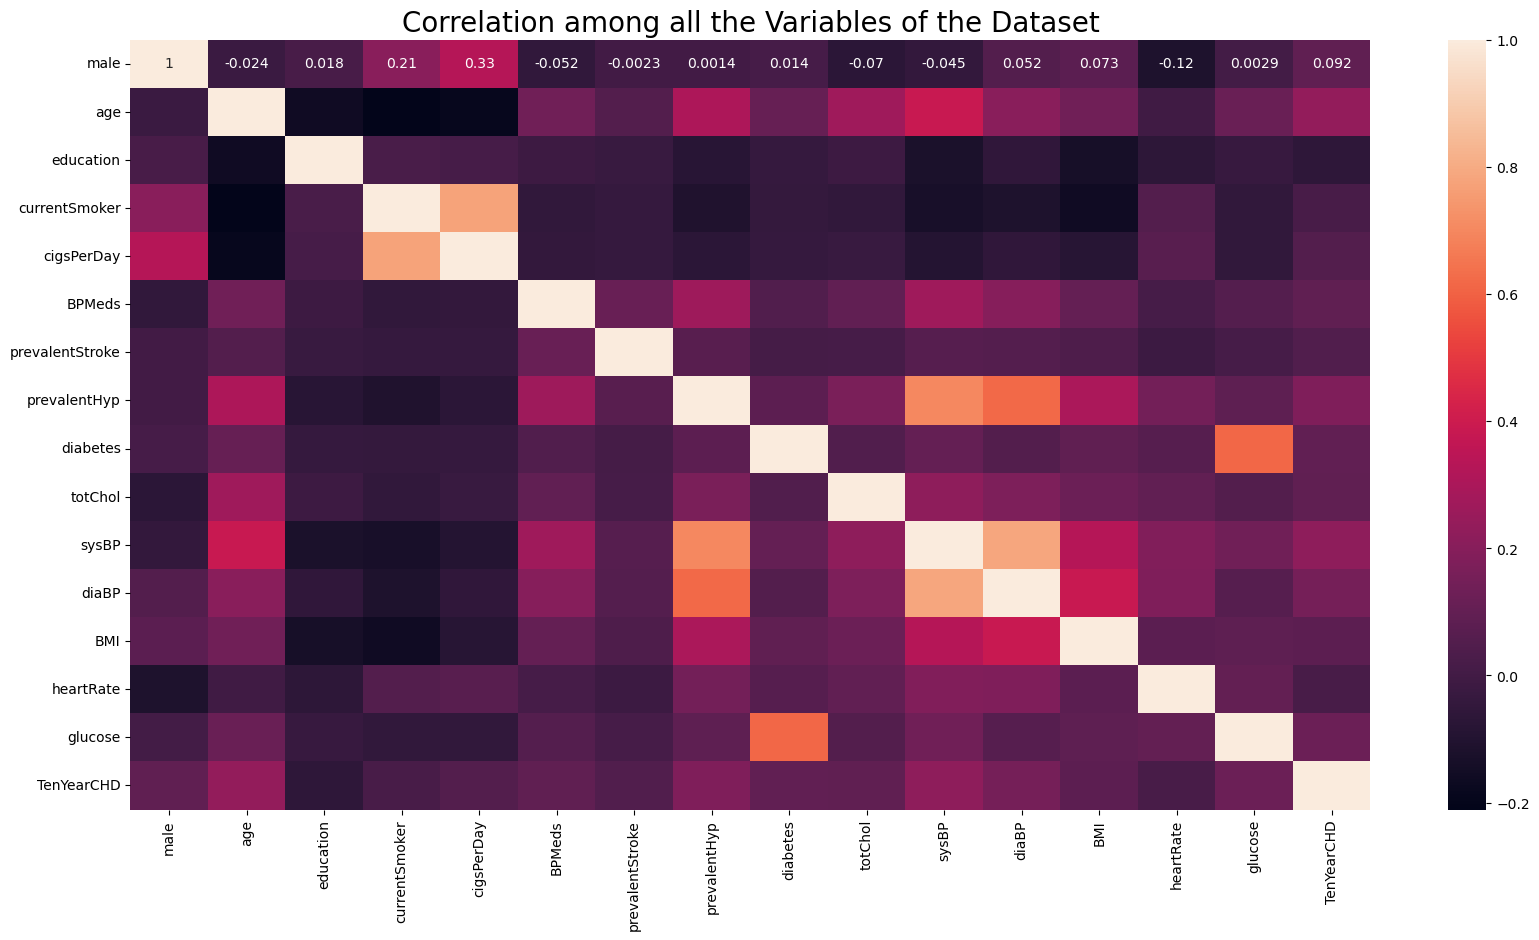

In [103]:
cor=heartdata.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

Dropping the education column because it is of no significance

In [104]:
heart = heartdata.drop(['education'], axis=1)

In [105]:
heart.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Checking distributions using histograms

C:\Users\HP\AppData\Local\Temp\ipykernel_6372\509201609.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  heart.hist(ax = ax)


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'currentSmoker'}>,
        <Axes: title={'center': 'cigsPerDay'}>],
       [<Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>, <Axes: >]], dtype=object)

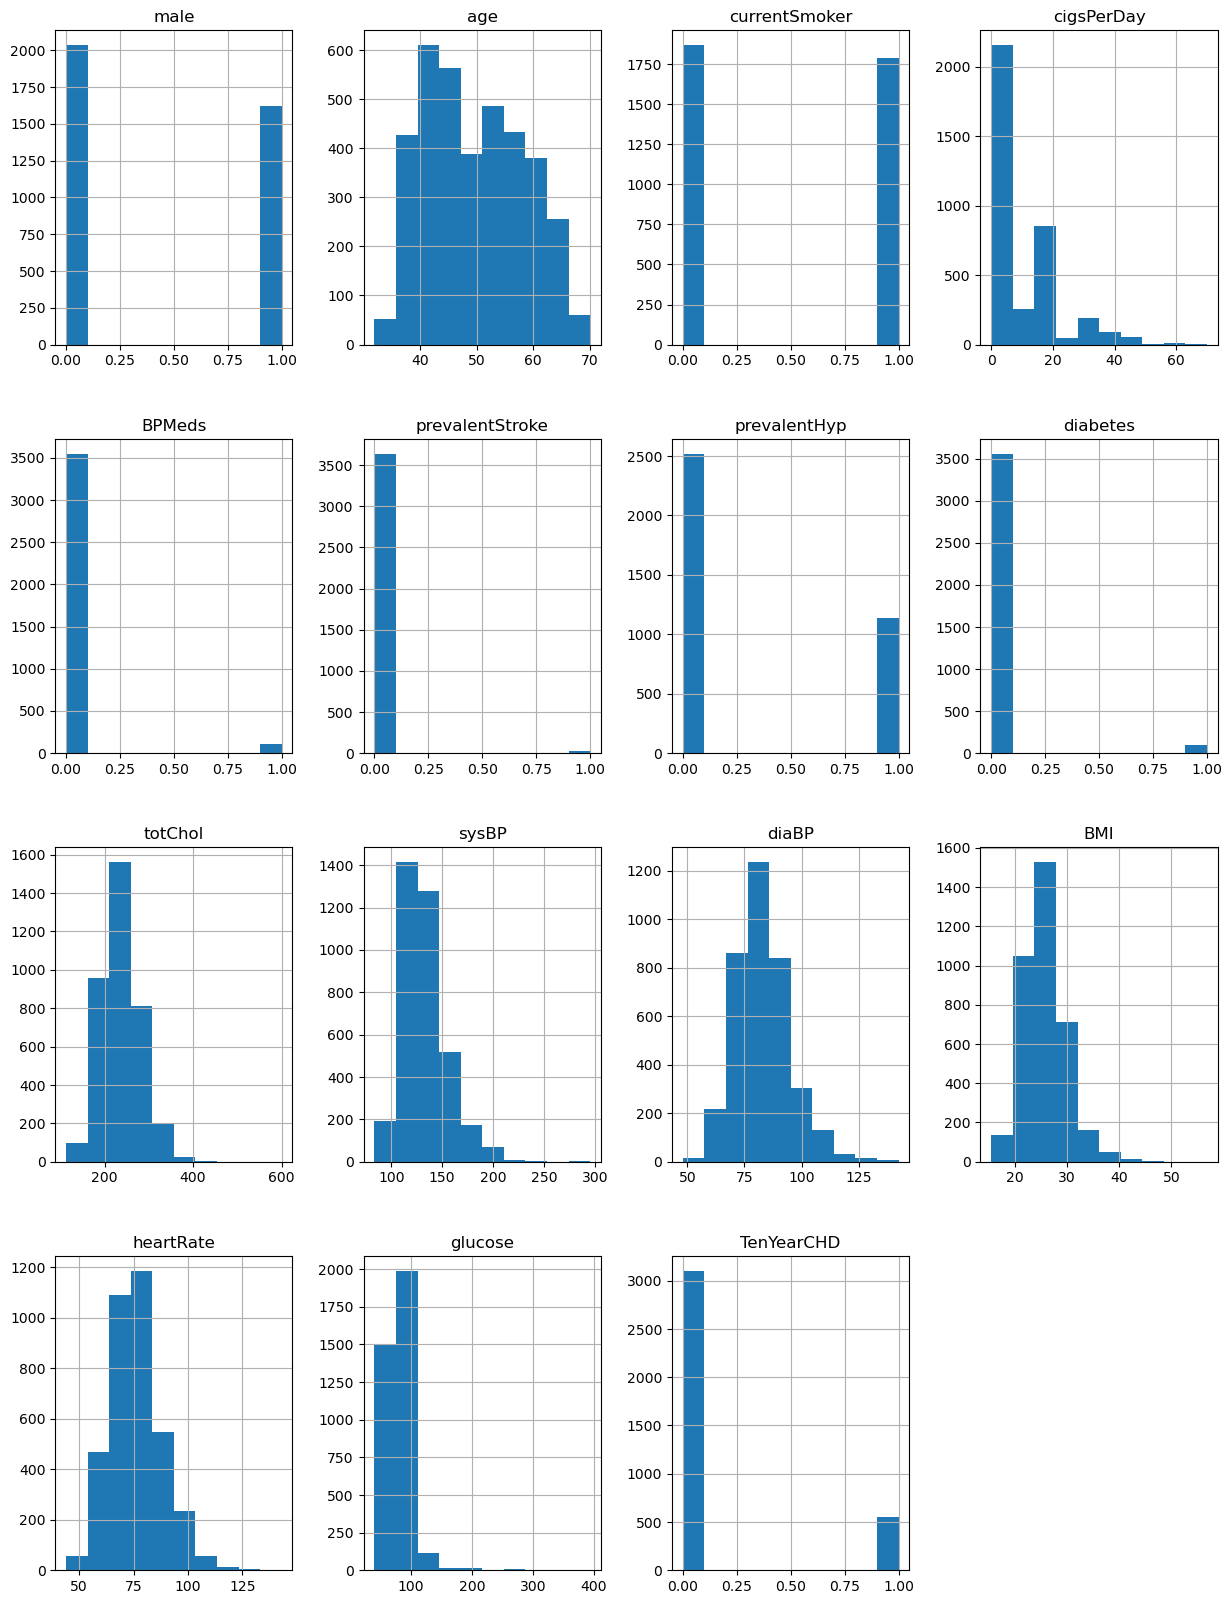

In [106]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart.hist(ax = ax)

Distribution of heart diseases among age groups

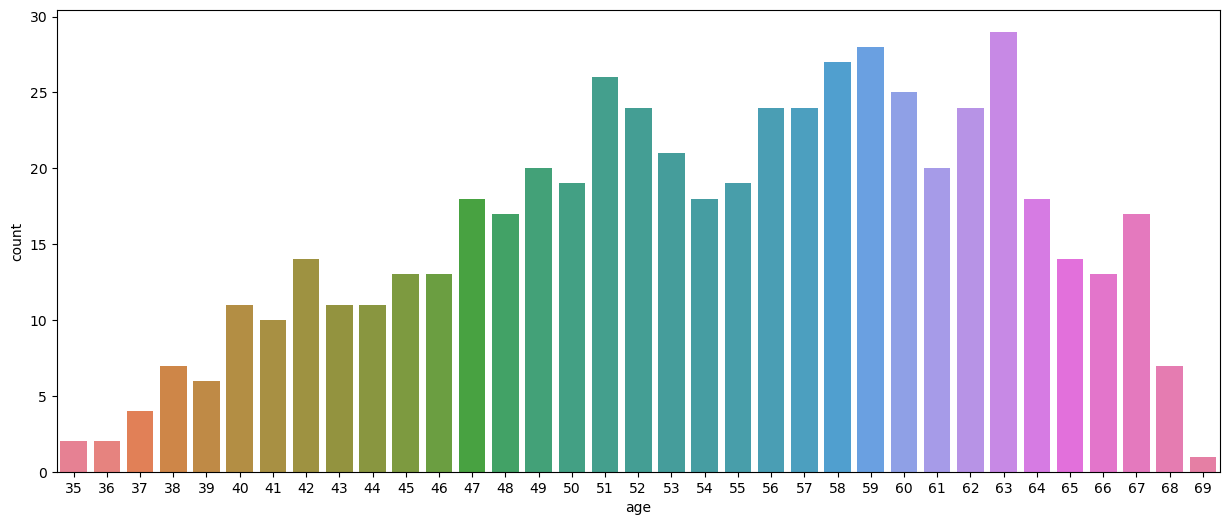

In [107]:
positive_cases = heart[heart['TenYearCHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age', data = positive_cases, palette='husl')
plt.show()

Now, I will look into some risk factors. Smoking is said to increase the risk of CHD. Now we try to visualize this relationship.

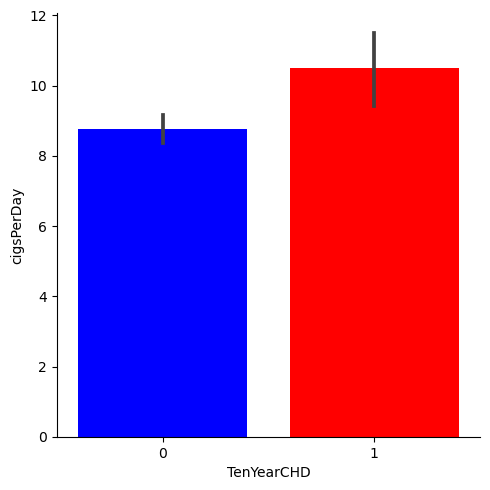

In [108]:
plot = sns.catplot(x='TenYearCHD', y='cigsPerDay', kind='bar', data=heart)

# Modify the colors of the bars
colors = ['blue', 'red']  # Define colors for each bar (0 and 1)
for i, patch in enumerate(plot.ax.patches):
    patch.set_facecolor(colors[i])

# Show the plot
plt.show()

It can be seen that patients who have a ten year CHD risk smoke more cigarettes per day than those who do not.

Now, I will try to see if there is a relationship between age and the ten year risk of CHD. I will sort this by the category smoker.

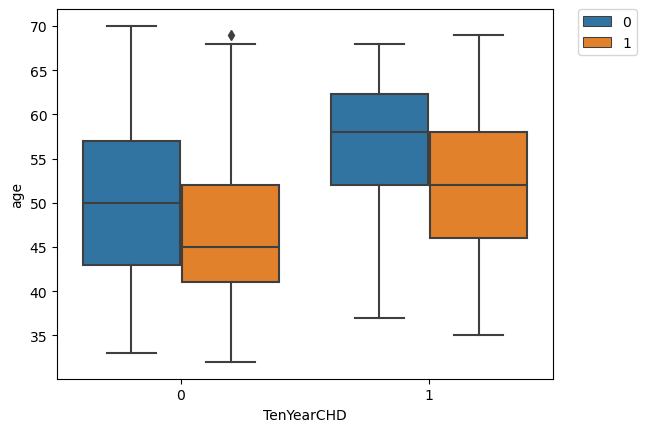

In [109]:
sns.boxplot(x='TenYearCHD',y='age',hue='currentSmoker',data=heart)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From here, it can be seen that older patients are more likely to develop CHD. Smokers seem to be at a larger risk of developing CHD at a younger age, as compared to non-smokers.

Next, I will take a look at the relationship between age, prevalent stroke, and the ten year risk of developing CHD.

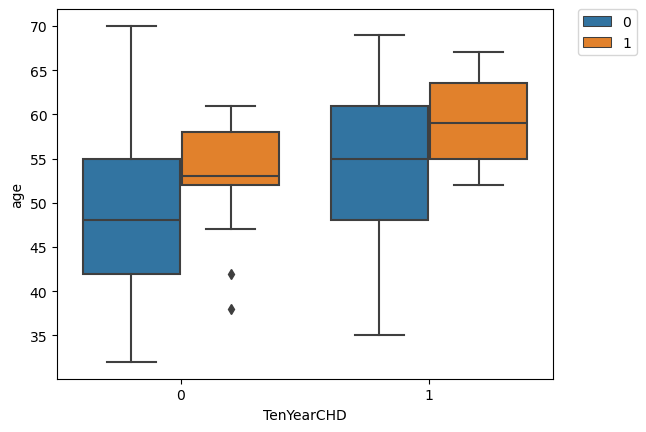

In [110]:
sns.boxplot(x='TenYearCHD',y='age',hue='prevalentStroke',data=heart)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It looks as though strokes are more prevalent in participants of an older age group.

Now, I will take a look at the variables age, diabetes, and ten year risk of developing CHD.

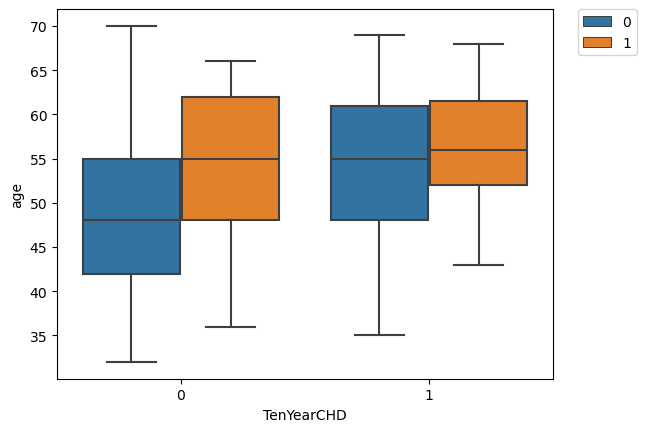

In [111]:
sns.boxplot(x='TenYearCHD',y='age',hue='diabetes',data=heart)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Again, it looks as though an older participant is more likely to have diabetes than a younger one.

Next, I will take a look at both systolic and diastolic blood pressure, and visualize their relationship with ten year CHD risk.

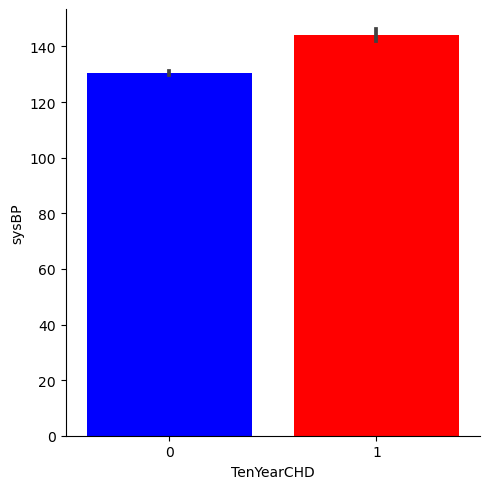

In [112]:
plot = sns.catplot(x='TenYearCHD', y='sysBP', kind='bar', data=heart)

# Modify the colors of the bars
colors = ['blue', 'red']  # Define colors for each bar (0 and 1)
for i, patch in enumerate(plot.ax.patches):
    patch.set_facecolor(colors[i])

# Show the plot
plt.show()

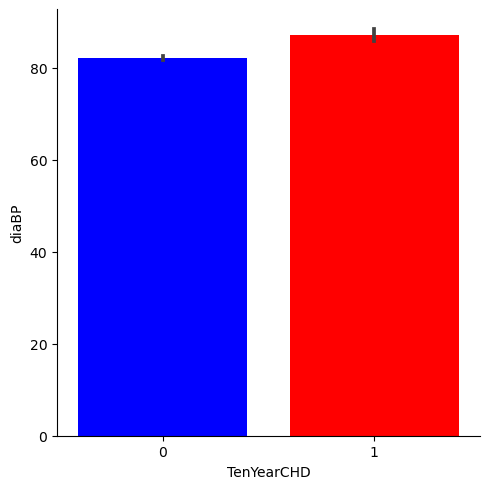

In [113]:
plot= sns.catplot(x='TenYearCHD',y='diaBP',kind='bar',data=heart)
# Modify the colors of the bars
colors = ['blue', 'red']  # Define colors for each bar (0 and 1)
for i, patch in enumerate(plot.ax.patches):
    patch.set_facecolor(colors[i])

# Show the plot
plt.show()

Blood pressure does seem to be linked with coronary heart disease. Patients with a ten year CHD risk seem to have higher blood pressure than the ones who don't.

obesity was found to be a risk factor in developing CHD. I will now take a look at the relationship between BMI and the ten year risk of CHD.

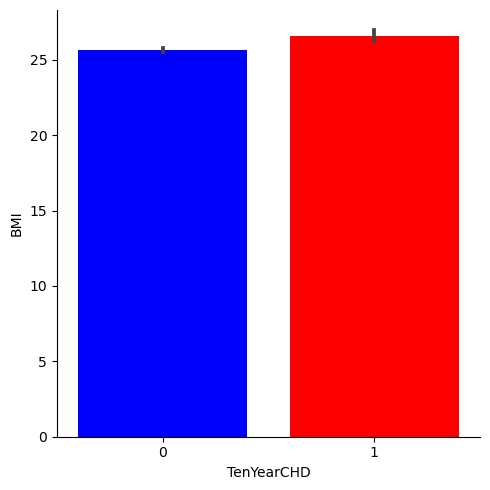

In [114]:
plot= sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=heart)
# Modify the colors of the bars
colors = ['blue', 'red']  # Define colors for each bar (0 and 1)
for i, patch in enumerate(plot.ax.patches):
    patch.set_facecolor(colors[i])

# Show the plot
plt.show()

Patients with CHD are seen to have slightly higher BMI than patients without.

Earlier, high BP was said to increase the risk of CHD. Finally, I will be taking a look at BP medications, and see if there is a relationship.



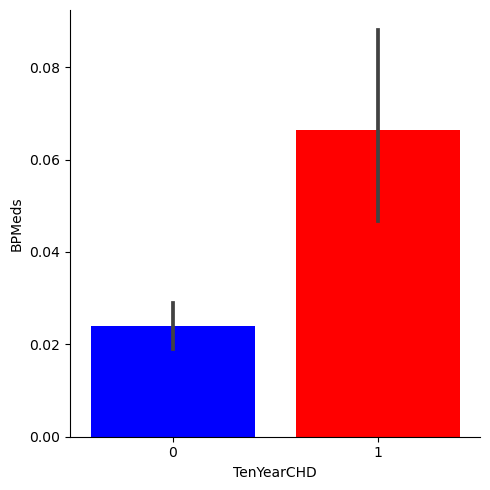

In [115]:
plot= sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=heart)
# Modify the colors of the bars
colors = ['blue', 'red']  # Define colors for each bar (0 and 1)
for i, patch in enumerate(plot.ax.patches):
    patch.set_facecolor(colors[i])

# Show the plot
plt.show()

 higher dosage of BP medications is associated with a larger ten year CHD risk.

Now, I will take a look at total cholesterol levels. An increase in cholesterol levels was found to increase the risk of CHD.

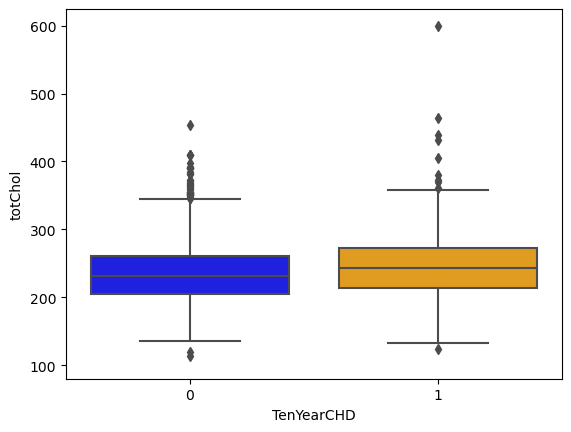

In [116]:
sns.boxplot(x='TenYearCHD', y='totChol', data=heart, palette=['blue', 'orange'])

# Set the y-axis limit
plt.ylim(80)

# Show the plot
plt.show()

Patients with a ten year CHD risk have slightly higher cholesterol levels than patients who don't, though the difference is very small and not significant. This may be attributed to the fact that the variable 'total cholesterol' includes both LDL and HDL. LDL, or 'bad cholesterol' is said to increase the risk of CHD. HDL, or 'good cholesterol' is said to decrease the risk of CHD. The variable total cholesterol includes both of them, which is probably why its hard to see a proper relationship in the plot above. If the data set had the two kinds of cholesterol as separate variables, the outcome may have been clearer.

Moving forward, we will identify the features with the most importance for the outcome variable Heart Disease


In [117]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = heart.iloc[:,0:14]  #independent columns
y = heart.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs       Score
9          sysBP  669.136021
13       glucose  379.914235
1            age  296.200344
8        totChol  250.490205
3     cigsPerDay  155.798307
10         diaBP  142.521814
6   prevalentHyp   82.845455
7       diabetes   31.067621
4         BPMeds   28.191569
0           male   17.107751
11           BMI   15.785436


In [118]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,sysBP,669.136021
13,glucose,379.914235
1,age,296.200344
8,totChol,250.490205
3,cigsPerDay,155.798307
10,diaBP,142.521814
6,prevalentHyp,82.845455
7,diabetes,31.067621
4,BPMeds,28.191569
0,male,17.107751


Visualizing feature selection

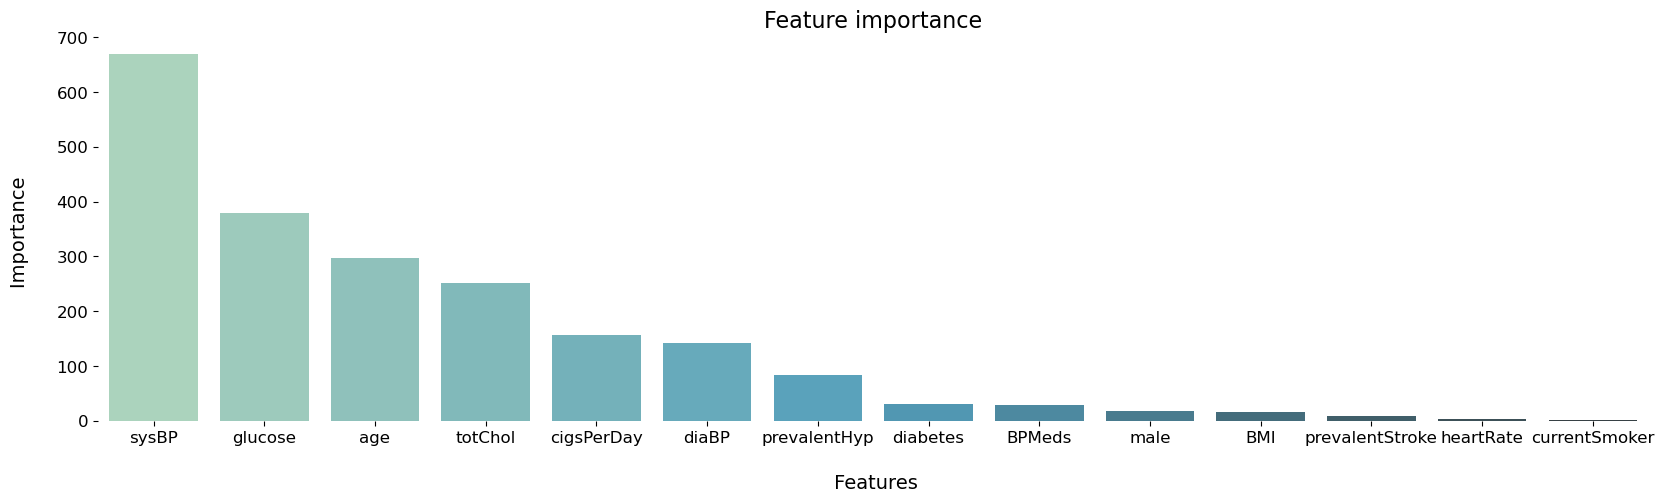

In [119]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Selecting the 10 most impactful features for the target variable

In [120]:
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

Now we create a new data frame with selected features

In [121]:
df = heart[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


Finding the statistics of this dataframe.

In [122]:
df.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,132.370558,81.852925,49.551941,236.847731,9.025424,82.917031,0.311646,0.027064,0.030344,0.443685,0.152269
std,22.086866,23.904164,8.562029,44.097681,11.921590,11.974258,0.463229,0.162292,0.171557,0.496886,0.359331
min,83.500000,40.000000,32.000000,113.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,71.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,78.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,143.875000,87.000000,56.000000,263.000000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.000000,394.000000,70.000000,600.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking correlation again

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
sysBP,1.000000,0.134651,0.388267,0.219925,-0.094781,0.786669,0.697675,0.102552,0.271263,-0.045358,0.222821
glucose,0.134651,1.000000,0.118349,0.049884,-0.053726,0.063540,0.086942,0.614820,0.054232,0.002940,0.121990
age,0.388267,0.118349,1.000000,0.268252,-0.189295,0.208283,0.306239,0.109092,0.134732,-0.024412,0.233983
totChol,0.219925,0.049884,0.268252,1.000000,-0.030400,0.174422,0.166655,0.048451,0.094083,-0.070321,0.091338
cigsPerDay,-0.094781,-0.053726,-0.189295,-0.030400,1.000000,-0.056746,-0.070460,-0.036961,-0.046504,0.330322,0.052014
diaBP,0.786669,0.063540,0.208283,0.174422,-0.056746,1.000000,0.617734,0.050686,0.199630,0.051872,0.150124
prevalentHyp,0.697675,0.086942,0.306239,0.166655,-0.070460,0.617734,1.000000,0.080556,0.262910,0.001424,0.181387
diabetes,0.102552,0.614820,0.109092,0.048451,-0.036961,0.050686,0.080556,1.000000,0.049066,0.013819,0.093431
BPMeds,0.271263,0.054232,0.134732,0.094083,-0.046504,0.199630,0.262910,0.049066,1.000000,-0.052124,0.089152
male,-0.045358,0.002940,-0.024412,-0.070321,0.330322,0.051872,0.001424,0.013819,-0.052124,1.000000,0.091688


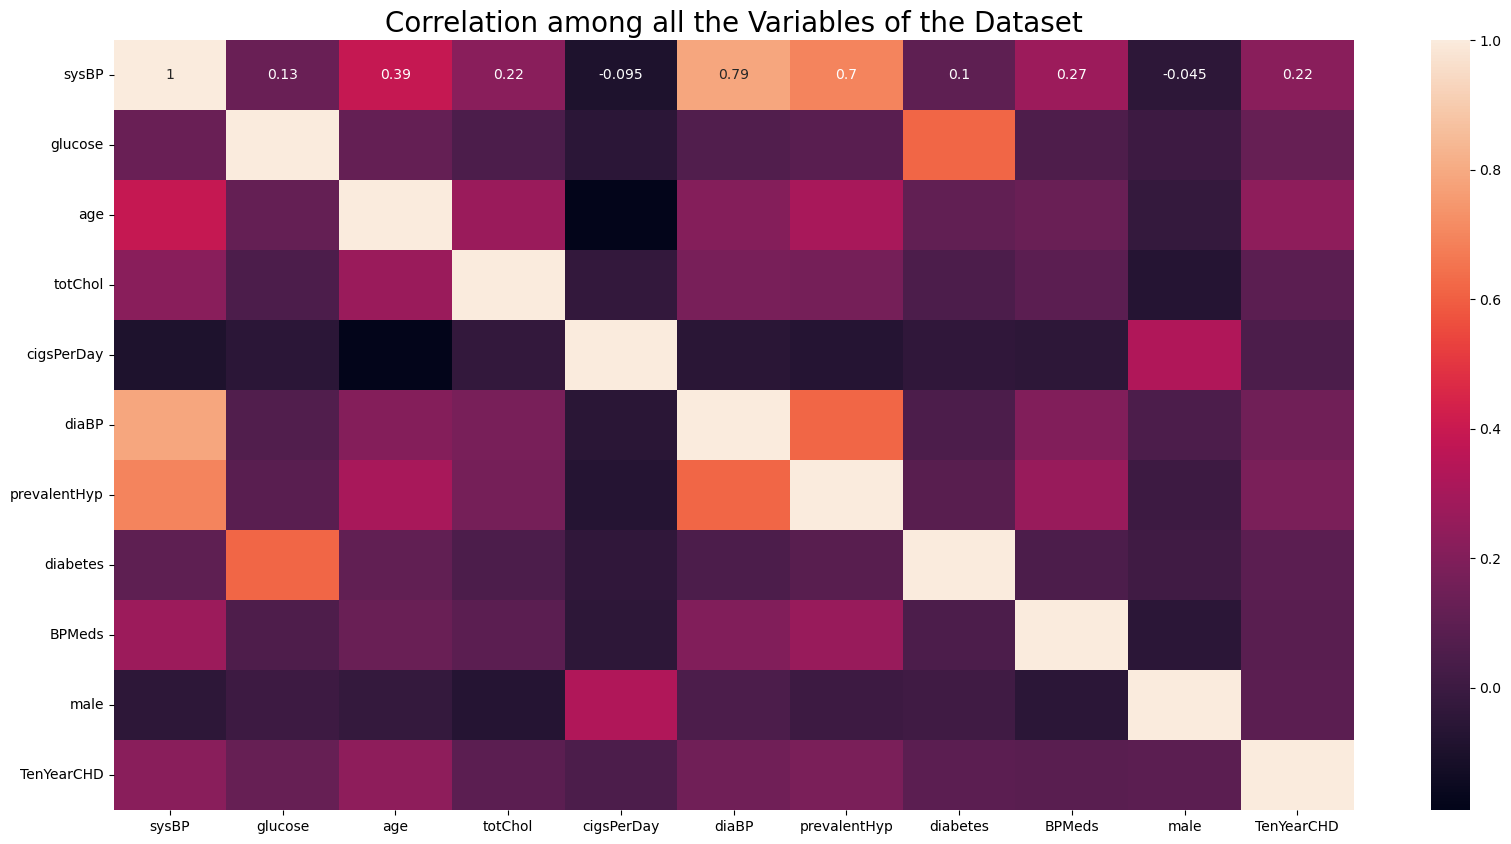

In [123]:
cor=df.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

Divide train test: 80 % - 20 %

In [124]:
from sklearn.model_selection import train_test_split

X = df[['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'male']]  # Independent variables
y = df['TenYearCHD']  # Dependent variable (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the resulting datasets
print("Training set - Features:", X_train.shape, "Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Labels:", y_test.shape)


Training set - Features: (2926, 10) Labels: (2926,)
Testing set - Features: (732, 10) Labels: (732,)


Applying SVM

Accuracy: 0.8333333333333334
Precision: 0.6944444444444445
F1 Score: 0.7575757575757576
Recall: 0.8333333333333334
Confusion Matrix:
 [[610   0]
 [122   0]]


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


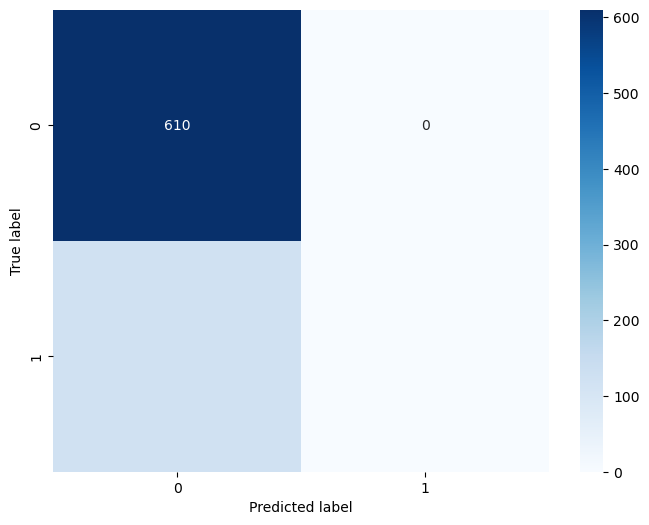

In [125]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

# Train the support vector machine classifier
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Construct confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Applying Random Forest classifier

Accuracy: 0.8346994535519126
Precision: 0.789789950429728
F1 Score: 0.7747457013070257
Recall: 0.8346994535519126
Confusion Matrix:
 [[604   6]
 [115   7]]


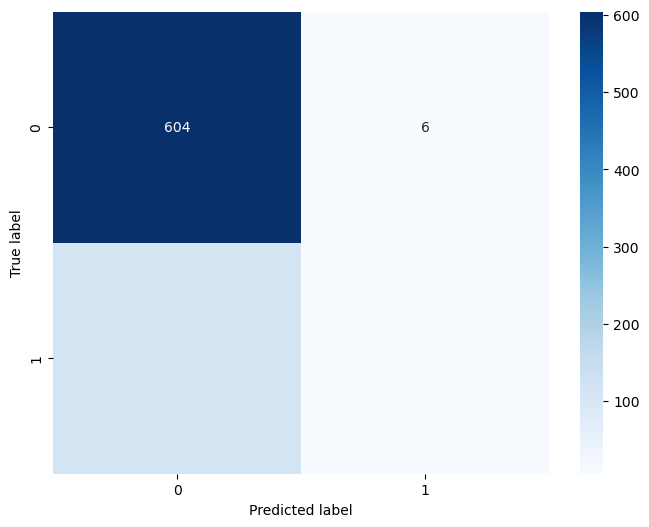

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

# Train the random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Construct confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Applying Decision tree classifier

Accuracy: 0.7595628415300546
Precision: 0.7514880952380951
F1 Score: 0.7554026822319506
Recall: 0.7595628415300546
Confusion Matrix:
 [[527  83]
 [ 93  29]]


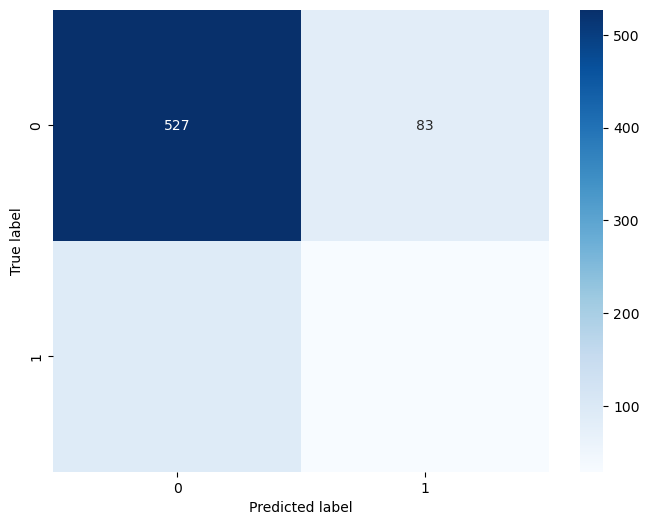

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

# Train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Construct confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Applying logistic regression

Accuracy: 0.8237704918032787
Precision: 0.7406322640632264
F1 Score: 0.7620558968971226
Recall: 0.8237704918032787
Confusion Matrix:
 [[599  11]
 [118   4]]


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


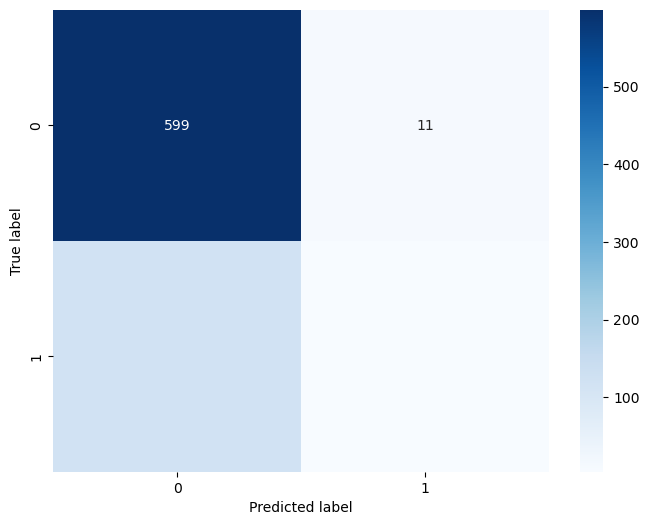

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Construct confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Applying K nearest neighbour

Accuracy: 0.8333333333333334
Precision: 0.7904761904761904
F1 Score: 0.7903572254717294
Recall: 0.8333333333333334
Confusion Matrix:
 [[594  16]
 [106  16]]


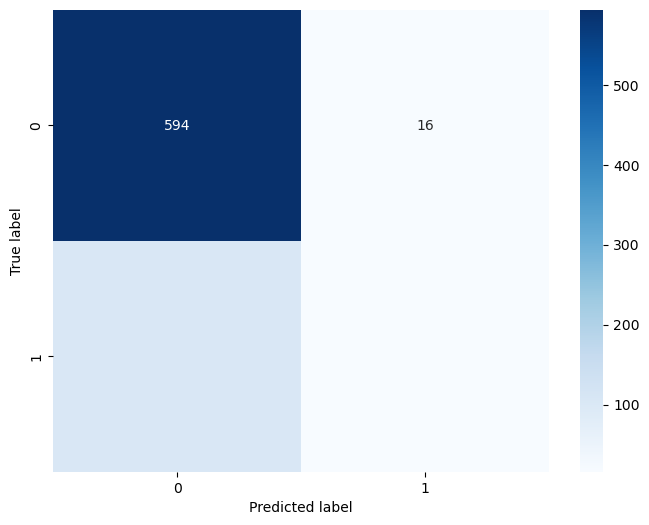

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

# Train the k-nearest neighbor classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)



# Construct confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [130]:

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




# Split features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()

# Add input layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7911 - loss: 0.5245 - val_accuracy: 0.8498 - val_loss: 0.3909
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8560 - loss: 0.3785 - val_accuracy: 0.8515 - val_loss: 0.3809
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8488 - loss: 0.3809 - val_accuracy: 0.8567 - val_loss: 0.3777
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8444 - loss: 0.3933 - val_accuracy: 0.8481 - val_loss: 0.3875
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.3640 - val_accuracy: 0.8584 - val_loss: 0.3803
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8509 - loss: 0.3638 - val_accuracy: 0.8567 - val_loss: 0.3865
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.3587 - val_accuracy: 0.8601 - val_loss: 0.3829
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8594 - loss: 0.3578 - val_accuracy: 0.8549 - val_loss: 0.3883
Epo

Accuracy: 0.8128415300546448
Precision: 0.7777091983690568
F1 Score: 0.7896462288619152
Recall: 0.8128415300546448
Confusion Matrix:
 [[569  41]
 [ 96  26]]


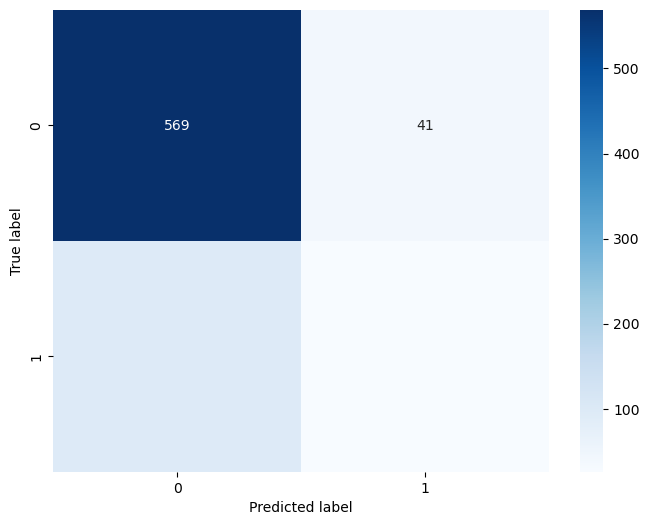

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Construct confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8387978142076503
F1 Score: 0.20270270270270271
Recall: 0.12295081967213115
Precision: 0.5769230769230769


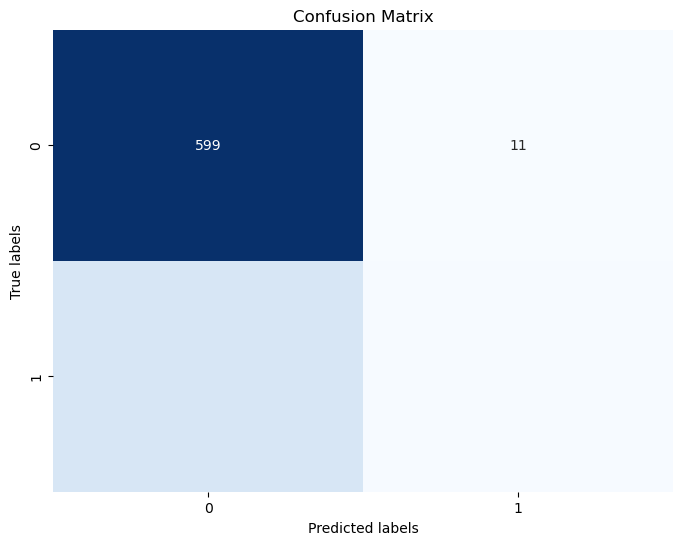

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataset where the last column is the target variable
# You may need to preprocess your data accordingly (e.g., handle missing values, encode categorical variables)

# Splitting the dataset into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying AdaBoost Classifier
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(X_train, y_train)

# Making predictions
y_pred = adaboost_clf.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

# Drawing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [133]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for predictions
y_pred_tuned = best_model.predict(X_test)

# Calculating evaluation metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)

# Save necessary objects to joblib file
joblib_file_path = 'tuned_adaboost_model.joblib'
joblib.dump({
    'grid_search': grid_search,
    'best_params': best_params,
    'best_score': best_score,
    'best_model': best_model,
    'accuracy_tuned': accuracy_tuned,
    'f1_tuned': f1_tuned,
    'recall_tuned': recall_tuned,
    'precision_tuned': precision_tuned
}, joblib_file_path)

print("Tuned AdaBoost model saved to joblib file successfully!")


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Li

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best Score: 0.8533820232590724
Tuned Model Metrics:
Accuracy: 0.8360655737704918
F1 Score: 0.03225806451612903
Recall: 0.01639344262295082
Precision: 1.0


In [138]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for predictions
y_pred_tuned = best_model.predict(X_test)

# Calculating evaluation metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)

# Save necessary objects to joblib file
joblib_file_path = 'tuned_adaboost_model.joblib'
joblib.dump({
    'grid_search': grid_search,
    'best_params': best_params,
    'best_score': best_score,
    'best_model': best_model,
    'accuracy_tuned': accuracy_tuned,
    'f1_tuned': f1_tuned,
    'recall_tuned': recall_tuned,
    'precision_tuned': precision_tuned
}, joblib_file_path)

print("Tuned AdaBoost model saved to joblib file successfully!")


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\Li

Tuned AdaBoost model saved to joblib file successfully!
